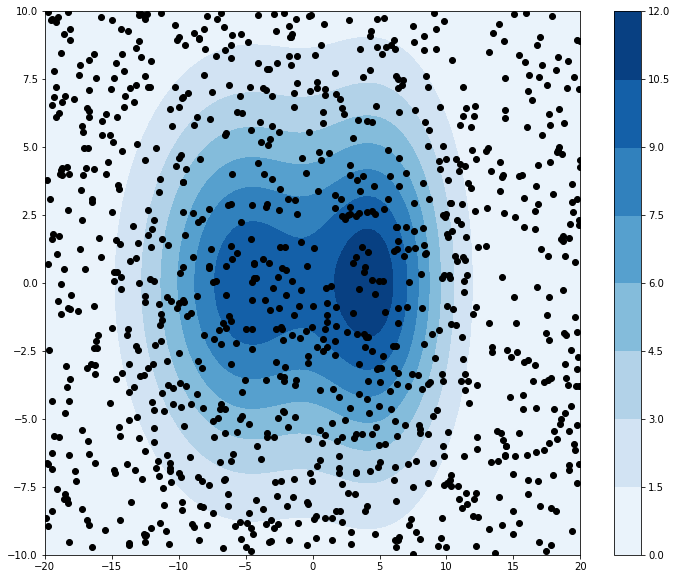

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


# create some fake background field 
x = np.linspace(-20, 20, 100)
y = np.linspace(-10, 10, 100)
xgrid, ygrid = np.meshgrid(x, y)
z1 = 10*np.exp(-(xgrid-5)**2/25 - (ygrid)**2/40)
z2 = 10*np.exp(-(xgrid+5)**2/50 - (ygrid)**2/40)
z = z1+z2

# populate background field with some random points 
xr = np.random.randint(x.min(), x.max(), 1000) + np.random.rand(1000)
yr = np.random.randint(y.min(), y.max(), 1000) + np.random.rand(1000)

# plot data
plt.figure(figsize=(12, 10))
im = plt.contourf(x, y, z, cmap='Blues')
plt.scatter(xr, yr, c='k')
plt.ylim(y.min(), y.max())
plt.xlim(x.min(), x.max())
plt.colorbar(im)
plt.show()

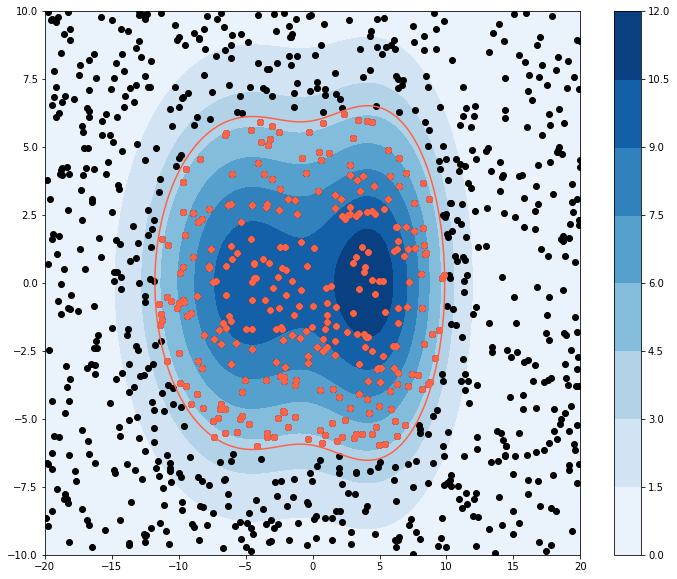

In [2]:
# Example 1: find all the points that are within the z=4 contour
plt.figure(figsize=(12, 10))

cs = plt.contour(x, y, z, [4], colors='tomato') 
p = cs.collections[0].get_paths()[0]  
# p is a Path object, see here for more details: 
# https://stackoverflow.com/questions/5666056/matplotlib-extracting-data-from-contour-lines

# NOTE: 
# If you already have a set of points that define a closed shape, 
# you can create a Path object for it by doing:
# 
#  from matplotlib.path import Path
#  xy_coords = list(zip(x, y))
#  xy_path = Path(xy_coords)


coords = np.array(list(zip(xr, yr)))
r = p.contains_points(coords) 
# r is a boolean array that selects all points within the z=4 contour

# plot data again
im = plt.contourf(x, y, z, cmap='Blues')
plt.scatter(xr, yr, c='k')
plt.scatter(xr[r], yr[r], c='tomato')
plt.ylim(y.min(), y.max())
plt.xlim(x.min(), x.max())
plt.colorbar(im)
plt.show()


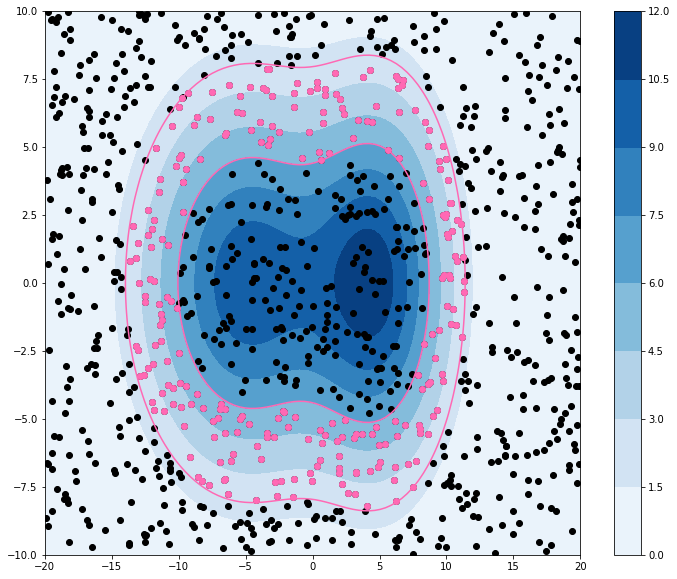

In [3]:
# Example 2: find all the points that are between the z=2 and z=6 contours
plt.figure(figsize=(12, 10))

cs = plt.contour(x, y, z, [2, 6], colors='hotpink') 
p1 = cs.collections[0].get_paths()[0]  
p2 = cs.collections[1].get_paths()[0]  

r1 = p1.contains_points(coords) # find points within z=2 contour
r2 = p2.contains_points(coords) # find points within z=6 contour
r1[r2] = False # ignore the points within z=2 contour that are also within z=6 contour

# plot data again
im = plt.contourf(x, y, z, cmap='Blues')
plt.scatter(xr, yr, c='k')
plt.scatter(xr[r1], yr[r1], c='hotpink')
plt.ylim(y.min(), y.max())
plt.xlim(x.min(), x.max())
plt.colorbar(im)
plt.show()